In [17]:
#Do install apoc and graphdatascience packages in neo4j and neo4j, py2neo and matplotlib before running this notebook
#and set apoc.export.file.enabled=true in your apoc.conf
#importing required packages

from neo4j import GraphDatabase
from py2neo import Graph
from py2neo.data import Node, Relationship
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [2]:
#creating driver to connect to Neo4j
url = "bolt://localhost:7687"
username = "neo4j"
password = "anujbansal"

driver = GraphDatabase.driver(url, auth = (username,password))

In [3]:
#function to run cypher queries
def run_cypher_query(query):
    with driver.session() as session:
        result = session.run(query)
        return result.data()

In [4]:
#cleaning the cypher database

query = """
    Match(n) Detach Delete n;
"""
results = run_cypher_query(query)

In [5]:
#Loading the data file 0 in neo4j
query = """LOAD CSV WITH HEADERS FROM "file:///ncvr_numrec_1000000_modrec_2_ocp_20_myp_0_nump_5.csv" AS row
WITH row
LIMIT 2000
CREATE (x:Recid {Recid:row.recid})
SET x.givenname = toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),
x.surname = toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),
x.suburb = toupper(apoc.text.replace(row.suburb,'[^a-zA-Z0-9 ]', '')),
x.postcode = apoc.text.replace(row.postcode,'[^0-9]', ''),
x.source = 0,
x.matchkey = SUBSTRING(toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),0,2),
x.matchkey2 = SUBSTRING(toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),0,2);"""
results = run_cypher_query(query)


In [6]:
#Loading the data file 1 in neo4j
query = """LOAD CSV WITH HEADERS FROM "file:///ncvr_numrec_1000000_modrec_2_ocp_20_myp_1_nump_5.csv" AS row
WITH row
LIMIT 2000
CREATE (x:Recid {Recid:row.recid})
SET x.givenname = toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),
x.surname = toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),
x.suburb = toupper(apoc.text.replace(row.suburb,'[^a-zA-Z0-9 ]', '')),
x.postcode = apoc.text.replace(row.postcode,'[^0-9]', ''),
x.source = 1,
x.matchkey = SUBSTRING(toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),0,2),
x.matchkey2 = SUBSTRING(toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),0,2);"""
results = run_cypher_query(query)

In [7]:
#Loading the data file 2 in neo4j
query = """LOAD CSV WITH HEADERS FROM "file:///ncvr_numrec_1000000_modrec_2_ocp_20_myp_2_nump_5.csv" AS row
WITH row
LIMIT 2000
CREATE (x:Recid {Recid:row.recid})
SET x.givenname = toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),
x.surname = toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),
x.suburb = toupper(apoc.text.replace(row.suburb,'[^a-zA-Z0-9 ]', '')),
x.postcode = apoc.text.replace(row.postcode,'[^0-9]', ''),
x.source = 2,
x.matchkey = SUBSTRING(toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),0,2),
x.matchkey2 = SUBSTRING(toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),0,2);"""
results = run_cypher_query(query)

In [8]:
#Loading the data file 3 in neo4j
query = """LOAD CSV WITH HEADERS FROM "file:///ncvr_numrec_1000000_modrec_2_ocp_20_myp_3_nump_5.csv" AS row
WITH row
LIMIT 2000
CREATE (x:Recid {Recid:row.recid})
SET x.givenname = toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),
x.surname = toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),
x.suburb = toupper(apoc.text.replace(row.suburb,'[^a-zA-Z0-9 ]', '')),
x.postcode = apoc.text.replace(row.postcode,'[^0-9]', ''),
x.source = 3,
x.matchkey = SUBSTRING(toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),0,2),
x.matchkey2 = SUBSTRING(toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),0,2);"""
results = run_cypher_query(query)

In [9]:
#Loading the data file 4 in neo4j
query = """LOAD CSV WITH HEADERS FROM "file:///ncvr_numrec_1000000_modrec_2_ocp_20_myp_4_nump_5.csv" AS row
WITH row
LIMIT 2000
CREATE (x:Recid {Recid:row.recid})
SET x.givenname = toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),
x.surname = toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),
x.suburb = toupper(apoc.text.replace(row.suburb,'[^a-zA-Z0-9 ]', '')),
x.postcode = apoc.text.replace(row.postcode,'[^0-9]', ''),
x.source = 4,
x.matchkey = SUBSTRING(toupper(apoc.text.replace(row.surname,'[^a-zA-Z ]', '')),0,2),
x.matchkey2 = SUBSTRING(toupper(apoc.text.replace(row.givenname,'[^a-zA-Z ]', '')),0,2);"""
results = run_cypher_query(query)

In [10]:
query = """
MATCH (n)
WITH n.source AS category, COLLECT(n) AS nodes
RETURN category, size(nodes) AS count
ORDER BY count DESC;"""
results = run_cypher_query(query)
display(results)

[{'category': 0, 'count': 2000},
 {'category': 1, 'count': 2000},
 {'category': 2, 'count': 2000},
 {'category': 3, 'count': 2000},
 {'category': 4, 'count': 2000}]

('KADELYN', {'givenname': 'KADELYN', 'surname': 'GRAGNANI', 'postcode': '2873', 'matchkey': 'GR', 'suburb': 'WAXHAW', 'Recid': '07852009', 'source': 0, 'matchkey2': 'KA'})
('RONEL', {'givenname': 'RONEL', 'surname': 'CARTER', 'postcode': '2788', 'matchkey': 'CA', 'suburb': 'WASHINGTON', 'Recid': '03138435', 'source': 0, 'matchkey2': 'RO'})
('JASON', {'givenname': 'JASON', 'surname': 'ROEHRIG', 'postcode': '2861', 'matchkey': 'RO', 'suburb': 'MILLERS CEEEK', 'Recid': '06117295', 'source': 0, 'matchkey2': 'JA'})
('ANTREA', {'givenname': 'ANTREA', 'surname': 'MURE', 'postcode': '27410', 'matchkey': 'MU', 'suburb': 'GREENSBORO', 'Recid': '06401695', 'source': 0, 'matchkey2': 'AN'})
('CAEDAR', {'givenname': 'CAEDAR', 'surname': 'OLIVER', 'postcode': '28542', 'matchkey': 'OL', 'suburb': 'JACKSONVILLE', 'Recid': '05202204', 'source': 0, 'matchkey2': 'CA'})
('JONN', {'givenname': 'JONN', 'surname': 'SNYDER', 'postcode': '27549', 'matchkey': 'SN', 'suburb': 'LOUISBUAHG', 'Recid': '04338459', 's

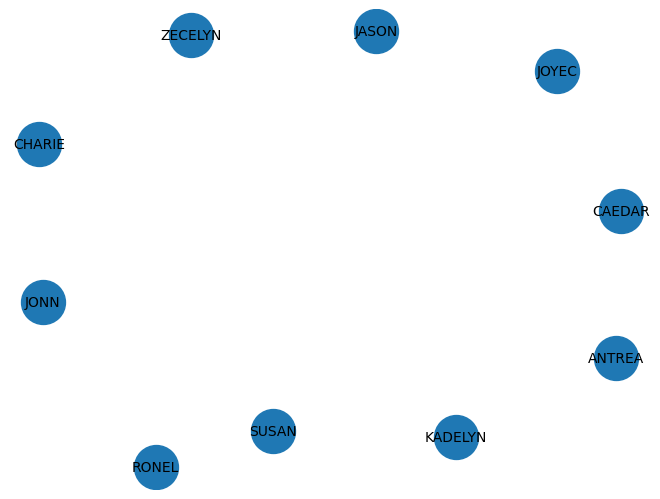

In [11]:
#visulaizing few nodes
results = run_cypher_query("MATCH (n:Recid) RETURN n LIMIT 10")


# Create an empty NetworkX graph
G = nx.Graph()

# Add nodes and edges based on the data
for entry in results:
    node_data = entry['n']
    node_id = node_data.get('givenname')  # Use a unique identifier as the node ID
    G.add_node(node_id, **node_data)

# Display information about the created nodes
for node in G.nodes(data=True):
    print(node)

# Visualize the graph using NetworkX
nx.draw(G, with_labels=True, node_size=1000, font_size=10, font_color='black')

In [12]:
query = """
//Pre-fix blocking with selecting records from different sources as we assume that each source dont have duplicates
MATCH(a:Recid)
MATCH(b:Recid)
WHERE (a<>b and a.source<>b.source) and (a.matchkey = b.matchkey or a.matchkey2 = b.matchkey2) 

//calculating similarities using jaroWinklerDistance
WITH *, toInteger(100 - apoc.text.jaroWinklerDistance(a.givenname,b.givenname)*100) AS sim1,
toInteger(100 - apoc.text.jaroWinklerDistance(a.surname,b.surname)*100) AS sim2,
toInteger(100- apoc.text.jaroWinklerDistance(a.suburb,b.suburb)*100) AS sim3,
toInteger(100 - apoc.text.jaroWinklerDistance(a.postcode,b.postcode)*100) AS sim4
//filetring based on threshold
WHERE sim1> 80 and sim2>80 and sim3>50 and sim4>50
//creating relationships for identified after threshold
MERGE (a)-[r:similar{sim1:sim1,sim2:sim2,sim3:sim3,sim4:sim4}]-(b)
"""
results = run_cypher_query(query)

In [14]:
#graph creation in neo4j
query = """
CALL gds.graph.project(
	'mygraph2',
	'Recid',
	{
	similar:{
	orientation:'UNDIRECTED',
	properties:['sim1','sim2']
	}
	}
)
"""
results = run_cypher_query(query)

In [15]:
#entity resolution in neo4j
query = """
CALL gds.labelPropagation.write('mygraph2', { writeProperty: 'community' }) YIELD communityCount, ranIterations, didConverge
"""
results = run_cypher_query(query)

In [16]:
#exporting the output
query ="""
call apoc.export.csv.query("Match(n) Return n.Recid, n.community, n.surname, n.givenname,n.postcode,n.suburb,n.source,n.matchkey,n.matchkey2","export2.csv",{})
"""
results = run_cypher_query(query)

ClientError: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `apoc.export.csv.query`: Caused by: java.lang.RuntimeException: Export to files not enabled, please set apoc.export.file.enabled=true in your apoc.conf.
Otherwise, if you are running in a cloud environment without filesystem access, use the `{stream:true}` config and null as a 'file' parameter to stream the export back to your client.}

In [16]:
driver.close()

In [20]:
#import the results csv
file_path = r"C:\Users\lenovo\Desktop\export2.csv"
df = pd.read_csv (file_path)

In [21]:
print(df.head())

      n.Recid  n.community   n.surname n.givenname n.postcode  \
0  "07852009"            0  "GRAGNANI"   "KADELYN"     "2873"   
1  "03138435"         6001    "CARTER"     "RONEL"     "2788"   
2  "06117295"         6003   "ROEHRIG"     "JASON"     "2861"   
3  "06401695"            3      "MURE"    "ANTREA"    "27410"   
4  "05202204"         4002    "OLIVER"    "CAEDAR"    "28542"   

          n.suburb n.matchkey n.matchkey2  
0         "WAXHAW"       "GR"        "KA"  
1     "WASHINGTON"       "CA"        "RO"  
2  "MILLERS CEEEK"       "RO"        "JA"  
3     "GREENSBORO"       "MU"        "AN"  
4   "JACKSONVILLE"       "OL"        "CA"  
